# Monitor Training

In [1]:
%matplotlib inline

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys; sys.path.append("../")
import maskflow

root_dir = Path("/home/hadim/.data/Neural_Network/Maskflow/Nucleus")
data_dir = root_dir / "Data"
model_dir = root_dir / "Models"
model_dir.mkdir(exist_ok=True)

# Import the configuration associated with this dataset and network.
config = maskflow.config.load_config(root_dir / "config.yaml")

# Select the model
model_name = '2018.11.06-15:09:33'
model_path = model_dir / model_name
metrics_path = model_path / "training_metrics.csv"

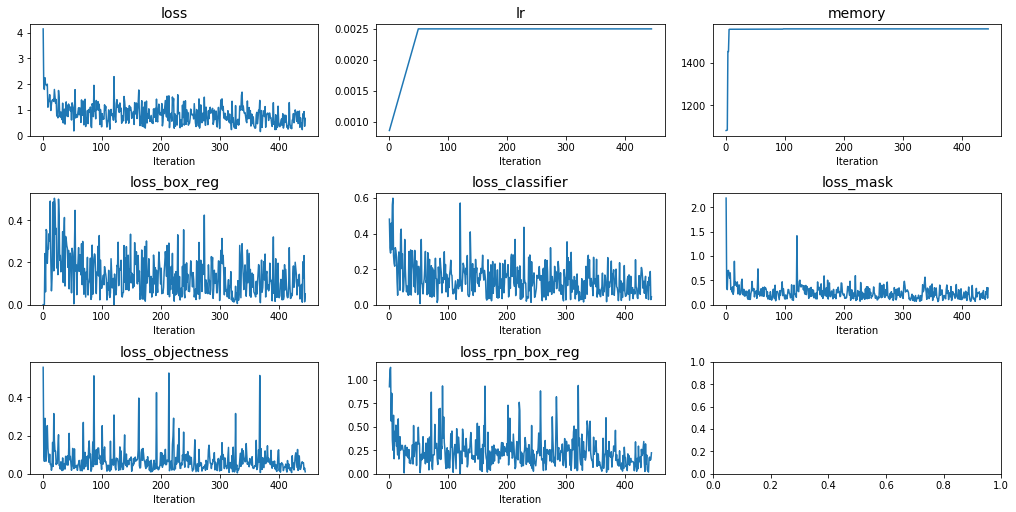

In [14]:
data = pd.read_csv(metrics_path)

metrics = ['loss', 'lr', 'memory', 'loss_box_reg', 'loss_classifier', 'loss_mask', 'loss_objectness', 'loss_rpn_box_reg']

base_fig_size = 14
n_plots = len(metrics)
ncols = 3
nrows = n_plots // ncols
nrows += 1 if (ncols * nrows) < n_plots else 0

w = base_fig_size
h = base_fig_size * (nrows/ncols) * 0.5

first_iteration = 0

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(w, h), constrained_layout=True)

for ax, metric in zip(axs.flat, metrics):
    
    data_mask = data['iteration'] > first_iteration
    
    ax.plot(data[data_mask]['iteration'], data[data_mask][metric])
    ax.set_xlabel('Iteration')
    ax.set_title(metric, fontsize=14)
    if 'loss' in metric:
        ax.set_ylim(0)